In [1]:
# Name Dipika Sharma
# DSC 530-T301 Data Exploration
# Final Project
# Week 12

In [2]:
import numpy as np

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
import thinkstats2

In [6]:
import thinkplot

# Reading the Life Expectancy Data

### Life expectancy means the number of years a person is expected to live based on the statistical average. There is certain variable on which life expectancy depends based on some research. As part of my course project, I will explore some of these variables to see the correlation between them and to understand how much these variables effect the life expectancy. These data information is from World Health Organization.


In [7]:
df = pd.read_csv("who_life_exp.csv")

In [8]:
# Lets see how many columns and rows we have in this dataset.
df.shape

(3111, 32)

In [9]:
# Dropping two columns because they have missing data
df.drop(['doctors','hospitals','une_school', 'une_literacy','une_poverty','une_edu_spend','hepatitis','gni_capita','une_hiv','une_pop','une_gni','country_code','une_life'],axis = 1,inplace = True)

In [10]:
# Replacing the missing data in "alcohol" column
df['alcohol'].replace(np.nan, 1.0 ,inplace  = True)

In [11]:
# Lets see how many columns and rows we have in this dataset.
df.shape

(3111, 19)

In [12]:
df_life = df.dropna(subset=['life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol', 'bmi'])

In [13]:
df_life.head(10)

,country,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_infant
0,Angola,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,32.0,21.0,31.0,41.14431,1.11099,1.90860,122.2
1,Angola,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,60.0,28.0,42.0,42.25467,2.04631,4.48352,118.9
2,Angola,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,59.0,22.0,47.0,43.37680,1.30863,3.32946,115.1
3,Angola,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,44.0,21.0,46.0,44.36387,1.46560,3.54797,110.8
4,Angola,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,43.0,18.0,47.0,45.35134,1.68663,3.96720,106.2
5,Angola,Africa,2005,52.72512,15.75107,322.7077,0.109205,0.018945,3.48640,22.3,10.2,0.8,21.0,14.0,47.0,46.33602,1.27876,2.85220,101.3
6,Angola,Africa,2006,53.82273,15.92263,313.7094,0.103120,0.017360,4.02043,22.4,10.0,0.9,21.0,8.0,44.0,47.15023,1.44412,2.68554,96.2
7,Angola,Africa,2007,54.97549,16.09804,302.8322,0.096850,0.015920,4.67969,22.5,9.8,1.0,58.0,43.0,48.0,47.96147,1.72199,2.97439,91.0
8,Angola,Africa,2008,56.12413,16.28414,292.1559,0.090765,0.014585,5.19452,22.6,9.6,1.2,48.0,36.0,49.0,48.77040,2.13844,3.32290,85.8
9,Angola,Africa,2009,57.29004,16.48146,281.0492,0.084800,0.013310,6.11778,22.7,9.4,1.3,46.0,36.0,50.0,49.57516,2.60046,3.84261,80.7


In [14]:
# Lets see general information about the columns.
df_life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3077 entries, 0 to 3110
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3077 non-null   object 
 1   region           3077 non-null   object 
 2   year             3077 non-null   int64  
 3   life_expect      3077 non-null   float64
 4   life_exp60       3077 non-null   float64
 5   adult_mortality  3077 non-null   float64
 6   infant_mort      3077 non-null   float64
 7   age1-4mort       3077 non-null   float64
 8   alcohol          3077 non-null   float64
 9   bmi              3077 non-null   float64
 10  age5-19thinness  3077 non-null   float64
 11  age5-19obesity   3077 non-null   float64
 12  measles          3069 non-null   float64
 13  polio            3069 non-null   float64
 14  diphtheria       3069 non-null   float64
 15  basic_water      3056 non-null   float64
 16  gghe-d           2994 non-null   float64
 17  che_gdp       

In [15]:
# Lets see the correlation between different variables in dataset.
df_life.corr()

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_infant
year,1.000000,0.190914,0.193108,-0.171210,-0.194108,-0.189820,0.017028,0.170244,-0.081810,0.278359,0.144771,0.130801,0.144042,0.114424,0.081865,0.110844,-0.186904
life_expect,0.190914,1.000000,0.885907,-0.945810,-0.928923,-0.862023,0.395352,0.597996,-0.565396,0.621000,0.638244,0.645276,0.639222,0.831800,0.608554,0.283468,-0.930731
life_exp60,0.193108,0.885907,1.000000,-0.773483,-0.768606,-0.658503,0.463392,0.458839,-0.556536,0.547764,0.503259,0.500650,0.502363,0.682213,0.670371,0.388050,-0.775391
adult_mortality,-0.171210,-0.945810,-0.773483,1.000000,0.810681,0.752839,-0.242713,-0.517095,0.455205,-0.571792,-0.523505,-0.535930,-0.527791,-0.733526,-0.484698,-0.197345,0.812390
infant_mort,-0.194108,-0.928923,-0.768606,0.810681,1.000000,0.906829,-0.439415,-0.641874,0.578230,-0.602402,-0.718920,-0.728487,-0.720645,-0.852431,-0.575354,-0.236661,0.996919
age1-4mort,-0.189820,-0.862023,-0.658503,0.752839,0.906829,1.000000,-0.302130,-0.615242,0.486846,-0.544587,-0.697007,-0.700264,-0.693640,-0.802480,-0.445453,-0.160265,0.899947
alcohol,0.017028,0.395352,0.463392,-0.242713,-0.439415,-0.302130,1.000000,0.271991,-0.476874,0.142196,0.292262,0.291713,0.296320,0.403868,0.522318,0.366991,-0.444091
bmi,0.170244,0.597996,0.458839,-0.517095,-0.641874,-0.615242,0.271991,1.000000,-0.685819,0.807143,0.468788,0.441274,0.446225,0.673261,0.461679,0.248024,-0.644441
age5-19thinness,-0.081810,-0.565396,-0.556536,0.455205,0.578230,0.486846,-0.476874,-0.685819,1.000000,-0.548601,-0.439146,-0.415575,-0.418306,-0.474768,-0.573455,-0.396721,0.586277
age5-19obesity,0.278359,0.621000,0.547764,-0.571792,-0.602402,-0.544587,0.142196,0.807143,-0.548601,1.000000,0.399031,0.376953,0.380033,0.588918,0.432588,0.210695,-0.606526


### As we can see from above that correlation exist for life_expect, life_exp60 with variables - bmi, age5-19obesity, measles, polio, diptheria, basic_water, doctors, gni_capita, gghe-d, une_life, une_gni

In [16]:
# Dropping two columns because they have missing data or we are not using them for analysis.
df_life.drop(['adult_mortality','infant_mort','age1-4mort', 'alcohol','age5-19thinness','che_gdp','une_infant'],axis = 1,inplace = True)

In [17]:
# checking the dataframe for null values, below function will count the number of NULL values for each column.
df_life.isnull().sum()

country            0
region             0
year               0
life_expect        0
life_exp60         0
bmi                0
age5-19obesity     0
measles            8
polio              8
diphtheria         8
basic_water       21
gghe-d            83
dtype: int64

# A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1)

Below are the variales will use for analysis:

1) life_expect
2) life_exp60
3) bmi
4) [age5-19obesity]
5) measles
6) polio
7) diphtheria
8) basic_water
9) [gghe-d]
10) une_life 

# Describe what the 5 variables mean in the dataset (Chapter 1).

Below are the variales will use for analysis:

1) life_expect - Life expectancy at birth (years)
2) life_exp60 - Life expectancy at age 60 (years)
3) bmi - Mean BMI (kg/m^2) (18+) (age-standardized estimate)
4) [age5-19obesity] - Prevalence of obesity among children and adolescents, BMI > (median + 2 s.d.) (crude estimate) (%)
5) measles - Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)
6) polio - Polio (Pol3) immunization coverage among 1-year-olds (%)
7) diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
8) basic_water - Population using at least basic drinking-water services
9) [gghe-d] - Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)
10) une_life - Life expectancy at birth, total (years)

# Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

Text(0.5, 0, 'Life Expectancy at birth Years')

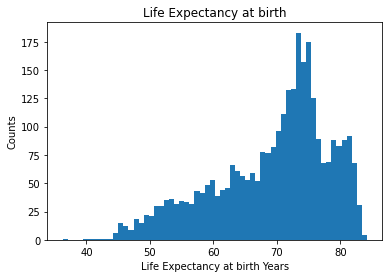

In [18]:
# Using matplotlib.pyplot for plotting Histogram for life_expect variable. 

plt.hist(df_life['life_expect'], bins=60)
plt.title('Life Expectancy at birth')
plt.ylabel("Counts")
plt.xlabel('Life Expectancy at birth Years')

### Life Expectancy at time of birth distribution seems to be left skewed distribution but has slight positive skew at the higher end of the years. Also we see longer tail on the left side of the plot.

Text(0.5, 0, 'Life Expectancy at age 60 Years')

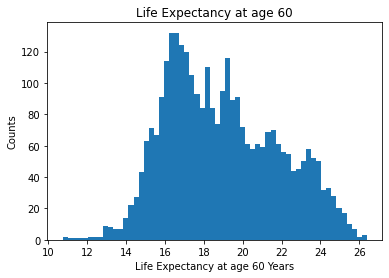

In [19]:
# Using matplotlib.pyplot for plotting Histogram for life_exp60 variable. 

plt.hist(df_life['life_exp60'], bins=60)
plt.title('Life Expectancy at age 60')
plt.ylabel("Counts")
plt.xlabel('Life Expectancy at age 60 Years')

### Life expectancy at age of 60 also has random distribution, as shown above, This plot does not have any apparent pattern like normal distribution and has several peaks.

Text(0.5, 0, 'BMI kg/m^2')

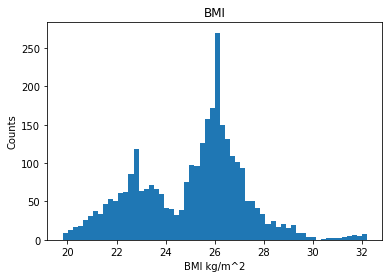

In [20]:
# Using matplotlib.pyplot for plotting Histogram for bmi variable.
plt.hist(df_life['bmi'], bins=60)
plt.title('BMI')
plt.ylabel("Counts")
plt.xlabel('BMI kg/m^2')

### Above graph shows two peaks one is normal distribution for bmi range between 24 kg/m^2 to 30 kg/m^2 and another peak towards the lower end of the bmi value less then 24 kg/m^2. Overall it seems like an bimodal shape distribution.

In [21]:
df_life_bmi = df_life[df_life.bmi <= 24]['bmi'].count()
print("The number of rows in dataset which has lower then 24 kg/m^2 bmi value is: {}".format(df_life_bmi))

The number of rows in dataset which has lower then 24 kg/m^2 bmi value is: 1014


In [22]:
df_life.shape

(3077, 12)

Text(0.5, 0, 'Obesity %tage')

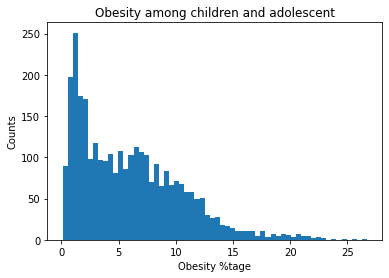

In [23]:
# Using matplotlib.pyplot for plotting Histogram for age5-19obesity variable.

plt.hist(df_life['age5-19obesity'], bins=60)
plt.title('Obesity among children and adolescent')
plt.ylabel("Counts")
plt.xlabel('Obesity %tage')

### Above plot has skewed distribution to the right. Since the distribution skewed to the right we called it positively skewed. 

Text(0.5, 0, 'Measles %tage')

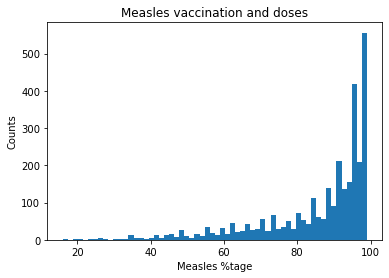

In [24]:
# Using matplotlib.pyplot for plotting Histogram for measles variable.

plt.hist(df_life['measles'], bins=60)
plt.title('Measles vaccination and doses')
plt.ylabel("Counts")
plt.xlabel('Measles %tage')

### Above plot has skewed distribution to the left. Since the distribution skewed to the left we called it negatively skewed. 

Text(0.5, 0, 'Polio %tage')

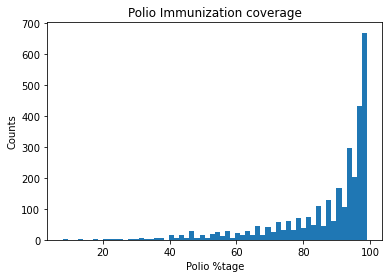

In [25]:
# Using matplotlib.pyplot for plotting Histogram for polio variable.

plt.hist(df_life['polio'], bins=60)
plt.title('Polio Immunization coverage')
plt.ylabel("Counts")
plt.xlabel('Polio %tage')

### Above plot has skewed distribution to the left. Since the distribution skewed to the left we called it negatively skewed. 

Text(0.5, 0, 'Diphtheria %tage')

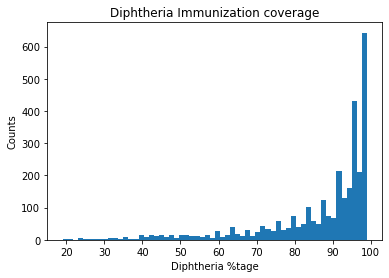

In [26]:
# Using matplotlib.pyplot for plotting Histogram for diphtheria variable.

plt.hist(df_life['diphtheria'], bins=60)
plt.title('Diphtheria Immunization coverage')
plt.ylabel("Counts")
plt.xlabel('Diphtheria %tage')

### Above plot has skewed distribution to the left. Since the distribution skewed to the left we called it negatively skewed. 

Text(0.5, 0, 'Population')

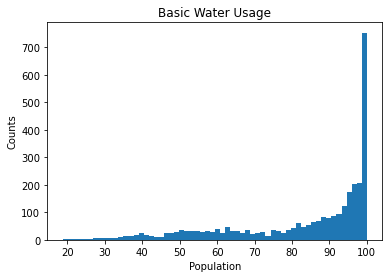

In [27]:
# Using matplotlib.pyplot for plotting Histogram for basic_water variable.

plt.hist(df_life['basic_water'], bins=60)
plt.title('Basic Water Usage')
plt.ylabel("Counts")
plt.xlabel('Population')

### Above plot has skewed distribution to the left. Since the distribution skewed to the left we called it negatively skewed. 

Text(0.5, 0, 'GDP %tage')

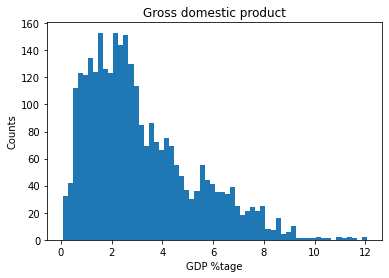

In [28]:
# Using matplotlib.pyplot for plotting Histogram for gghe-d variable.

plt.hist(df_life['gghe-d'], bins=60)
plt.title('Gross domestic product')
plt.ylabel("Counts")
plt.xlabel('GDP %tage')

### GDP % distribution has has skewed distribution to the right. Since the distribution skewed to the right we called it positively skewed. but this plot has more then one peak, it looks like an slight random distribution.

## Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

### All the selected Avariables for analysis are numeric and I have used describe() and mode() function to see mean, mode, and spread of each variable. This function will also display various properties like std, min/max values and 1st quartiles (25%), medians (50%) and 3rd quartiles (75%) values.

In [29]:
df_life[['life_expect', 'life_exp60', 'bmi', 'age5-19obesity', 'measles', 'polio', 'diphtheria', 'basic_water', 'gghe-d']].describe()

,life_expect,life_exp60,bmi,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d
count,3077.000000,3077.000000,3077.000000,3077.000000,3069.000000,3069.000000,3069.000000,3056.000000,2994.000000
mean,69.266719,18.936851,25.052714,5.972278,85.649397,86.696970,86.512545,83.601109,3.131700
std,9.094448,2.890288,2.193445,4.530812,15.245842,14.905725,15.287155,19.067001,2.094184
min,36.227360,10.728000,19.800000,0.100000,16.000000,8.000000,19.000000,18.695210,0.062360
25%,63.411990,16.632970,23.300000,2.000000,80.000000,82.000000,82.000000,72.350650,1.540805
50%,71.727020,18.560910,25.500000,5.200000,92.000000,93.000000,93.000000,92.273325,2.607355
75%,75.592730,21.138660,26.500000,8.900000,96.000000,97.000000,97.000000,98.566293,4.290345
max,84.166160,26.394020,32.200000,26.700000,99.000000,99.000000,99.000000,100.000010,12.062730


### Above is the mean and spread of all the numerica variables I am using for analysis.

In [30]:
print("The Mode for life_expect variable is: {} years".format(df_life.life_expect.mode()[0]))
print("The Mode for life_exp60 variable is: {} years".format(df_life.life_exp60.mode()[0]))
print("The Mode for bmi variable is: {} ".format(df_life.bmi.mode()[0]))
print("The Mode for age5-19obesity variable is: {} ".format(df_life['age5-19obesity'].mode()[0]))
print("The Mode for measles variable is: {} ".format(df_life.measles.mode()[0]))
print("The Mode for polio variable is: {} ".format(df_life.polio.mode()[0]))
print("The Mode for diphtheria variable is: {} ".format(df_life.diphtheria.mode()[0]))
print("The Mode for basic_water variable is: {} ".format(df_life.basic_water.mode()[0]))
print("The Mode for 'gghe-d' variable is: {} ".format(df_life['gghe-d'].mode()[0]))


The Mode for life_expect variable is: 67.03989 years
The Mode for life_exp60 variable is: 15.18697 years
The Mode for bmi variable is: 26.0 
The Mode for age5-19obesity variable is: 1.0 
The Mode for measles variable is: 99.0 
The Mode for polio variable is: 99.0 
The Mode for diphtheria variable is: 99.0 
The Mode for basic_water variable is: 100.0 
The Mode for 'gghe-d' variable is: 1.08423 


### Above is mode for all the numeric columns I am using for Analysis.

In [31]:
life_expect_lower = (63.411990 - (75.592730 - 63.411990) * 1.5)
life_expect_upper = (75.592730 + (75.592730 - 63.411990) * 1.5)

print("Life Expectancy at birth lower value for skew identification is {} years and upper value for skew identification is {} years".format(life_expect_lower, life_expect_upper))

Life Expectancy at birth lower value for skew identification is 45.14088 years and upper value for skew identification is 93.86384000000001 years


In [32]:
life_expect60_lower = (16.632970 - (21.138660 - 16.632970) * 1.5)
life_expect60_upper = (21.138660 + (21.138660 - 16.632970) * 1.5)

print("Life Expectancy at age 60 lower value for skew identification is {} years and upper value for skew identification is {} years".format(life_expect60_lower, life_expect60_upper))

Life Expectancy at age 60 lower value for skew identification is 9.874434999999998 years and upper value for skew identification is 27.897195000000004 years


### From the above we can see that the life expectancy at birth are from range 45 years to 94 years whereas the the life expectancy at age 60 records are from 10 years to 28 years.

In [33]:
bmi_lower = (23.300000 - (26.500000 - 23.300000) * 1.5)
bmi_upper = (26.500000 + (26.500000 - 23.300000) * 1.5)

print("BMI lower value for skew identification is {} kg/m^2 and upper value for skew identification is {} kg/m^2".format(bmi_lower, bmi_upper))

BMI lower value for skew identification is 18.5 kg/m^2 and upper value for skew identification is 31.299999999999997 kg/m^2


### For BMI the lower value is 18.5 kg/m^2 and higher value is 31.3 kg/m^2

In [34]:
# Using this IQR range for life_expect, life_exp60 and bmi we can remove outliers from dataset for all these variables. 
df_life_expect = df_life[(df_life.life_expect >= life_expect_lower) & (df_life.life_expect <= life_expect_upper)]
df_life_expect = df_life_expect[(df_life_expect.life_exp60 >= life_expect60_lower) & (df_life_expect.life_exp60 <= life_expect60_upper)]
df_life_expect = df_life_expect[(df_life_expect.bmi >= bmi_lower) & (df_life_expect.bmi <= bmi_upper)]

In [35]:
df_life_expect.describe()

,year,life_expect,life_exp60,bmi,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d
count,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3026.000000,3026.000000,3026.000000,3013.000000,2954.000000
mean,2008.016480,69.389649,18.971998,25.010481,5.894331,85.745869,86.786847,86.607072,83.664877,3.135354
std,4.896124,8.929278,2.875628,2.112949,4.382640,15.148167,14.843865,15.213976,18.997295,2.106004
min,2000.000000,45.241420,12.217520,19.800000,0.100000,16.000000,8.000000,19.000000,18.695210,0.062360
25%,2004.000000,63.477423,16.646010,23.300000,2.000000,80.000000,82.000000,82.000000,72.654460,1.529002
50%,2008.000000,71.713410,18.586690,25.500000,5.200000,92.000000,93.000000,93.000000,92.211270,2.601675
75%,2012.000000,75.653315,21.180570,26.500000,8.800000,96.000000,97.000000,97.000000,98.564370,4.319950
max,2016.000000,84.166160,26.394020,31.200000,23.000000,99.000000,99.000000,99.000000,100.000010,12.062730


## Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3). – Done in notebook.

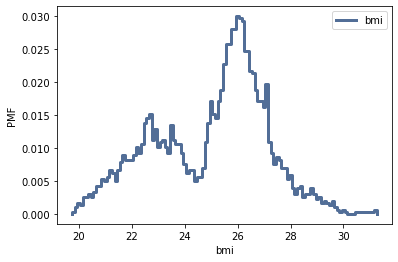

In [36]:
# Calculating the bmi PMF
pmf_bmi = thinkstats2.Pmf(df_life_expect.bmi, label='bmi')
thinkplot.Pmf(pmf_bmi)
thinkplot.Config(xlabel='bmi', ylabel='PMF')

In [37]:
# Lets divide the data into two scenarios, one is year less then 2003 and other scenario is year greater then 2003
less_2003_DF = df_life_expect[df_life_expect.year <=2003]
other_DF = df_life_expect[df_life_expect.year > 2003]

pmf_less_2003 = thinkstats2.Pmf(less_2003_DF.bmi, label='less 2003 PMF')
pmf_others = thinkstats2.Pmf(other_DF.bmi, label='Others PMF')

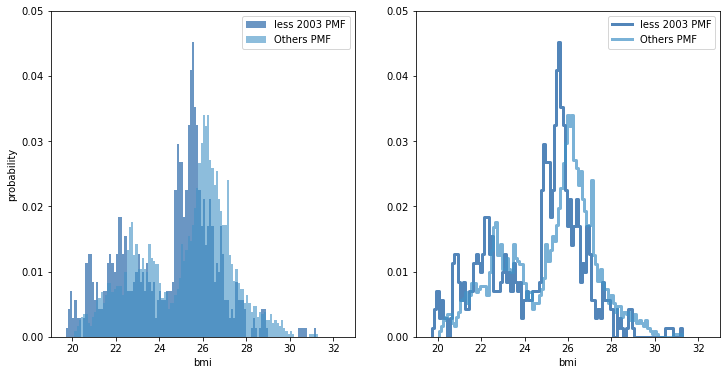

<Figure size 576x432 with 0 Axes>

In [38]:
# Comparing bmi PMF for year less then 2003 with year greater then 2003.

thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(pmf_less_2003, align='right', width=0.1)
thinkplot.Hist(pmf_others, align='left', width=0.1)

thinkplot.Config(xlabel='bmi',
                ylabel='probability',
                axis=[19, 33, 0, 0.05])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_less_2003, pmf_others])
thinkplot.Show(xlabel='bmi',
              axis=[19,33, 0, 0.05])

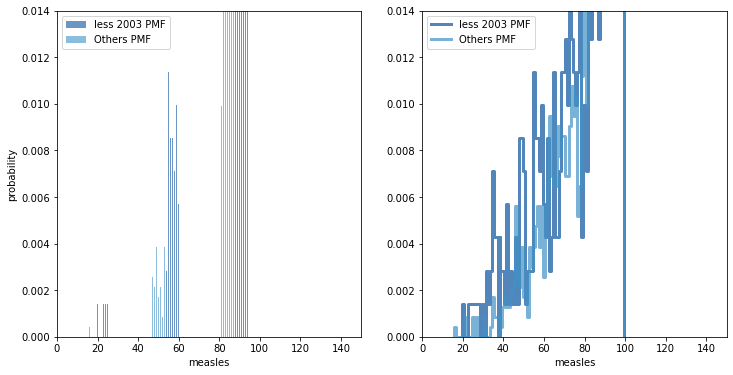

<Figure size 576x432 with 0 Axes>

In [39]:
# Comparing measles PMF for year less then 2003 with year greater then 2003.

pmf_less_2003 = thinkstats2.Pmf(less_2003_DF.measles, label='less 2003 PMF')
pmf_others = thinkstats2.Pmf(other_DF.measles, label='Others PMF')

thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(pmf_less_2003, align='right', width=0.1)
thinkplot.Hist(pmf_others, align='left', width=0.1)

thinkplot.Config(xlabel='measles',
                ylabel='probability',
                axis=[0, 150, 0, 0.014])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_less_2003, pmf_others])
thinkplot.Show(xlabel='measles',
              axis=[0,150, 0, 0.014])

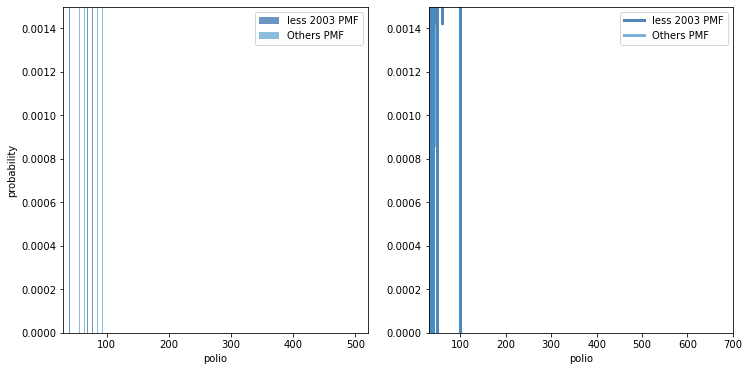

<Figure size 576x432 with 0 Axes>

In [40]:
# Comparing polio PMF for year less then 2003 with year greater then 2003.

pmf_less_2003 = thinkstats2.Pmf(less_2003_DF['polio'], label='less 2003 PMF')
pmf_others = thinkstats2.Pmf(other_DF['polio'], label='Others PMF')

thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(pmf_less_2003, align='right', width=0.1)
thinkplot.Hist(pmf_others, align='left', width=0.1)

thinkplot.Config(xlabel='polio',
                ylabel='probability',
                axis=[30,520, 0, 0.00150])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_less_2003, pmf_others])
thinkplot.Show(xlabel='polio',
              axis=[30,700, 0, 0.00150])

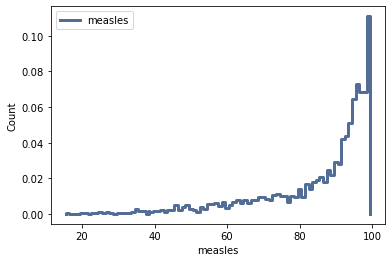

In [41]:
# calculating PMF for measles
hist = thinkstats2.Pmf(df_life_expect.measles, label='measles')
thinkplot.Pmf(hist)
thinkplot.Config(xlabel="measles", ylabel='Count')

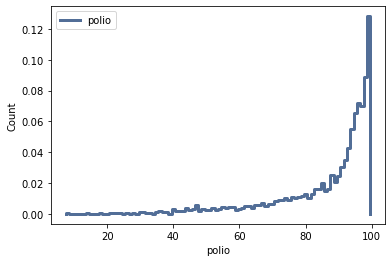

In [42]:
# calculating PMF for polio
hist = thinkstats2.Pmf(df_life_expect.polio, label='polio')
thinkplot.Pmf(hist)
thinkplot.Config(xlabel="polio", ylabel='Count')

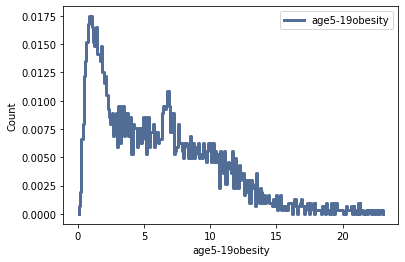

In [43]:
# calculating PMF for 'age5-19obesity'
hist = thinkstats2.Pmf(df_life_expect['age5-19obesity'], label='age5-19obesity')
thinkplot.Pmf(hist)
thinkplot.Config(xlabel="age5-19obesity", ylabel='Count')

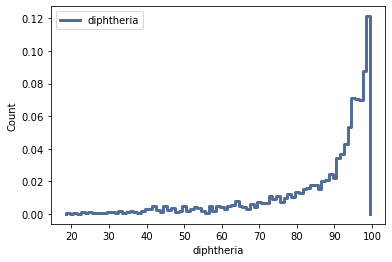

In [44]:
# Calculating PMF for diphtheria.
hist = thinkstats2.Pmf(df_life_expect.diphtheria, label='diphtheria')
thinkplot.Pmf(hist)
thinkplot.Config(xlabel="diphtheria", ylabel='Count')

## Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4)

The 90% confidence interval :  (51.898590000000006, 81.25372)


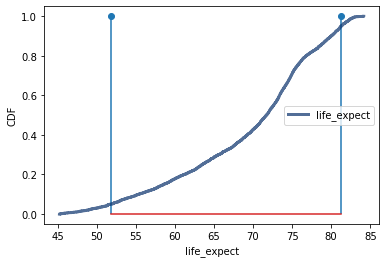

<Figure size 576x432 with 0 Axes>

In [45]:
# cdf creation for age based analysis and identifying 90% confidence interval

cdf = thinkstats2.Cdf(df_life_expect.life_expect, label='life_expect')
pr = cdf.PercentileRank(df_life_expect.life_expect.mean())

ci = (cdf.Percentile(5), cdf.Percentile(95))
print("The 90% confidence interval : ", ci)
 
horizontal = [ci[0], ci[1]]
vertical = [1, 1]
plt.stem(horizontal, vertical, use_line_collection = "TRUE")

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='life_expect', ylabel='CDF') #, xlim=[17, 33])

### Above CDF graph show for majority people the life expectancy at time of birth is from 50 years to 82 years.

The 90% confidence interval :  (15.0119, 24.04942)


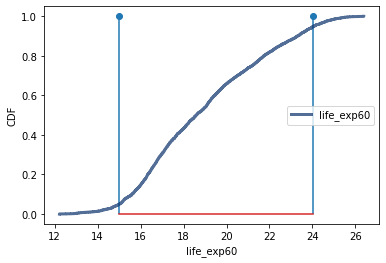

<Figure size 576x432 with 0 Axes>

In [46]:
# cdf creation for age based analysis and identifying 90% confidence interval

cdf = thinkstats2.Cdf(df_life_expect.life_exp60, label='life_exp60')
pr = cdf.PercentileRank(df_life_expect.life_exp60.mean())

ci = (cdf.Percentile(5), cdf.Percentile(95))
print("The 90% confidence interval : ", ci)
 
horizontal = [ci[0], ci[1]]
vertical = [1, 1]
plt.stem(horizontal, vertical, use_line_collection = "TRUE")

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='life_exp60', ylabel='CDF') #, xlim=[17, 33])

### At age above 60 years, the life expectancy for majority of people is between 15 to 24 years.

The 90% confidence interval :  (21.3, 28.1)


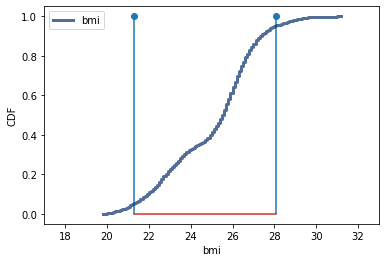

<Figure size 576x432 with 0 Axes>

In [47]:
# cdf creation for age based analysis and identifying 90% confidence interval
# Mean BMI (kg/m^2) (18+) (age-standardized estimate)

cdf = thinkstats2.Cdf(df_life_expect.bmi, label='bmi')
pr = cdf.PercentileRank(df_life_expect.bmi.mean())

ci = (cdf.Percentile(5), cdf.Percentile(95))
print("The 90% confidence interval : ", ci)
 
horizontal = [ci[0], ci[1]]
vertical = [1, 1]
plt.stem(horizontal, vertical, use_line_collection = "TRUE")

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='bmi', ylabel='CDF', xlim=[17, 33])

### Above CDF graph show that the majority of the people are expected to have bmi value from range 21 kg/m^2 to 28 kg/m^2

# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

mean of life_expect: 69.38964890243899 and stadard deviation of life_expect: 8.929278137928707


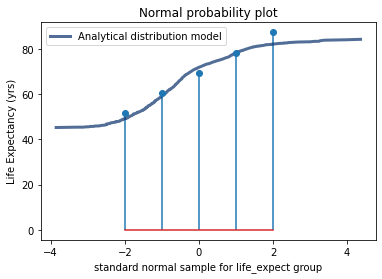

In [48]:
mu = df_life_expect.life_expect.mean()
sig = df_life_expect.life_expect.std()

print(f"mean of life_expect: {mu} and stadard deviation of life_expect: {sig}")

xs, ys = thinkstats2.NormalProbability(df_life_expect.life_expect)
thinkplot.Plot(xs, ys, label='Analytical distribution model')

horizontal = [-2, -1, 0, 1, 2]
vertical = [((mu-2*sig)), (mu-sig), mu, (mu+sig), (mu+2*sig)]
plt.stem(horizontal, vertical, use_line_collection = "TRUE")

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample for life_expect group',
                 ylabel='Life Expectancy (yrs)')
                # ylim = [20,35])

### Analytical distribution of life expectancy at birth is from 51 to 81 year.

mean of life_exp60: 18.97199819050759 and stadard deviation of life_exp60: 2.8756284152187996


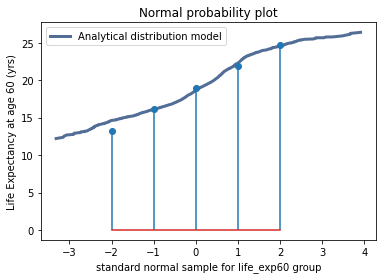

In [49]:
mu = df_life_expect.life_exp60.mean()
sig = df_life_expect.life_exp60.std()

print(f"mean of life_exp60: {mu} and stadard deviation of life_exp60: {sig}")

xs, ys = thinkstats2.NormalProbability(df_life_expect.life_exp60)
thinkplot.Plot(xs, ys, label='Analytical distribution model')

horizontal = [-2, -1, 0, 1, 2]
vertical = [((mu-2*sig)), (mu-sig), mu, (mu+sig), (mu+2*sig)]
plt.stem(horizontal, vertical, use_line_collection = "TRUE")

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample for life_exp60 group',
                 ylabel='Life Expectancy at age 60 (yrs)')
                # ylim = [20,35])

### Distribution of life expectancy at age 60 is from 14 to 24 years.

## Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [50]:
df_life_expect['life_expect2'] = df_life_expect.life_expect**2
df_life_expect['life_expect3'] = df_life_expect.life_expect**3
df_life_expect['bmi_root'] = df_life_expect.bmi**(1/2)
df_life_expect['bmi_log'] = np.log10(df_life_expect.bmi)

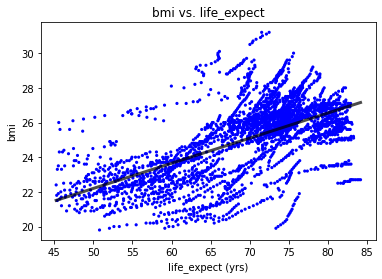

In [51]:
life_expect, bmi = df_life_expect.life_expect, df_life_expect.bmi

inter, slope = thinkstats2.LeastSquares(life_expect, bmi)

thinkplot.Scatter(life_expect, bmi, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(life_expect, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='life_expect (yrs)', ylabel='bmi', title='bmi vs. life_expect')

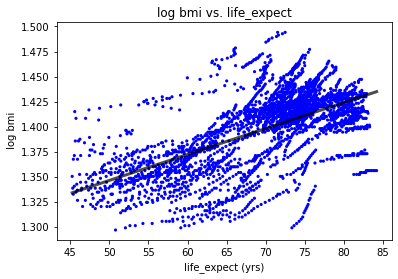

In [52]:
life_expect, bmi = df_life_expect.life_expect, df_life_expect.bmi_log

inter, slope = thinkstats2.LeastSquares(life_expect, bmi)

thinkplot.Scatter(life_expect, bmi, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(life_expect, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='life_expect (yrs)', ylabel=' log bmi', title='log bmi vs. life_expect')

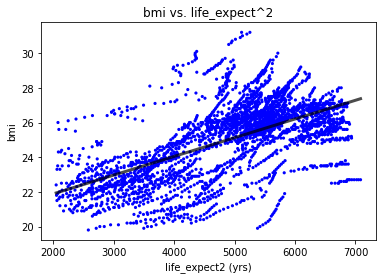

In [53]:
life_expect, bmi = df_life_expect.life_expect2, df_life_expect.bmi

inter, slope = thinkstats2.LeastSquares(life_expect, bmi)

thinkplot.Scatter(life_expect, bmi, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(life_expect, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='life_expect2 (yrs)', ylabel='bmi', title='bmi vs. life_expect^2')

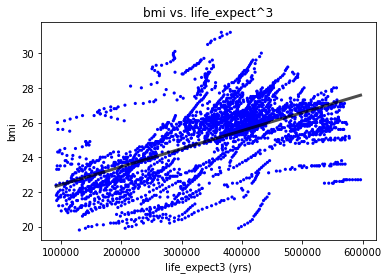

In [54]:
life_expect, bmi = df_life_expect.life_expect3, df_life_expect.bmi

inter, slope = thinkstats2.LeastSquares(life_expect, bmi)

thinkplot.Scatter(life_expect, bmi, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(life_expect, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='life_expect3 (yrs)', ylabel='bmi', title='bmi vs. life_expect^3')

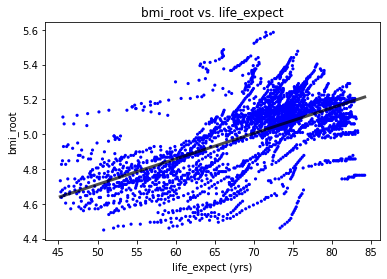

In [55]:
life_expect, bmi = df_life_expect.life_expect, df_life_expect.bmi_root

inter, slope = thinkstats2.LeastSquares(life_expect, bmi)

thinkplot.Scatter(life_expect, bmi, alpha=1.0, s=10)
xs, ys = thinkstats2.FitLine(life_expect, inter, slope)
thinkplot.Plot(xs, ys, color='black')
thinkplot.Config(xlabel='life_expect (yrs)', ylabel='bmi_root', title='bmi_root vs. life_expect')

## correlation table and heatmap

In [56]:
df_life_expect.corr()

,year,life_expect,life_exp60,bmi,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,life_expect2,life_expect3,bmi_root,bmi_log
year,1.000000,0.177384,0.184066,0.161333,0.270525,0.141296,0.125209,0.138267,0.103575,0.079231,0.175028,0.173133,0.160633,0.159898
life_expect,0.177384,1.000000,0.885890,0.612867,0.635477,0.643834,0.645835,0.639968,0.831927,0.617438,0.997339,0.989858,0.616381,0.619242
life_exp60,0.184066,0.885890,1.000000,0.475800,0.567575,0.502601,0.496344,0.498358,0.679276,0.674105,0.906232,0.921766,0.479585,0.482784
bmi,0.161333,0.612867,0.475800,1.000000,0.794291,0.486294,0.451159,0.457177,0.681154,0.480486,0.606126,0.594964,0.999693,0.998781
age5-19obesity,0.270525,0.635477,0.567575,0.794291,1.000000,0.410356,0.382311,0.385507,0.591444,0.448731,0.638301,0.636790,0.789350,0.783938
measles,0.141296,0.643834,0.502601,0.486294,0.410356,1.000000,0.923511,0.922469,0.661399,0.400753,0.632160,0.616687,0.490826,0.494876
polio,0.125209,0.645835,0.496344,0.451159,0.382311,0.923511,1.000000,0.963957,0.661499,0.415759,0.635428,0.621466,0.455512,0.459396
diphtheria,0.138267,0.639968,0.498358,0.457177,0.385507,0.922469,0.963957,1.000000,0.651014,0.412892,0.629789,0.616141,0.461710,0.465790
basic_water,0.103575,0.831927,0.679276,0.681154,0.591444,0.661399,0.661499,0.651014,1.000000,0.511049,0.826652,0.816193,0.686582,0.691396
gghe-d,0.079231,0.617438,0.674105,0.480486,0.448731,0.400753,0.415759,0.412892,0.511049,1.000000,0.642501,0.663744,0.483524,0.486091


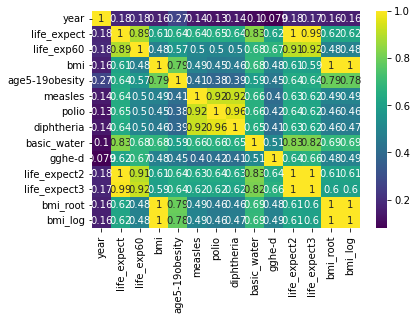

In [57]:
sns.heatmap(df_life_expect.corr(), annot=True, cmap="viridis");

## Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [58]:
### Testing correlation

## To check whether an observed correlation is statistically significant, we can run a permutation test with a different test statistic.

In [59]:
# Defining function to check if an observed correlation is real or by chance.

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [60]:
# Defining the correlation between variables for n number of records.
def CorTest1(n):
    
    m = 1000
    
    df_life_subset = df_life_expect.dropna(subset=['life_expect', 'polio'])
    
    data = df_life_subset.life_expect.values[:n], df_life_subset.polio.values[:n]
    
    ht = CorrelationPermute(data)
    pvalue = ht.PValue(m)
    
    return round(pvalue, 3)

In [61]:
print("Lets calculate the correlation between life expectancy and polio for 999 records is: {}".format(CorTest1(999)))

Lets calculate the correlation between life expectancy and polio for 999 records is: 0.0


The above show p-value 0 which shows that we do not see any correlation between life expectancy and polio for 1000 trials. It is a possibility that p value is less then 1/1000 and not zero. With 100 trial we exceeds the observed correlation under the null hypothesis.


In [62]:
# Lets compare the actual correlation and largest value in simulation to make sense of observed values. 
# Observed values is unexpected under the NUll Hypothesis.

cleaned = df_life_expect.dropna(subset=['life_expect', 'polio'])
data = cleaned.life_expect.values, cleaned.polio.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [63]:
ht.actual, ht.MaxTestStat()

(0.6458353470863037, 0.06320056236830938)

## Looking at the above we can say that the correlation between life expectancy and polio is not statitically significant. 

In [64]:
def CorTest2(n):
    
    m = 1000
    
    df_life_subset = df_life_expect.dropna(subset=['life_expect', 'bmi'])
    
    data = df_life_expect.life_expect2.values[:n], df_life_expect.bmi.values[:n]
    
    ht = CorrelationPermute(data)
    pvalue = ht.PValue(m)
    
    return round(pvalue, 3)

In [65]:
print("Lets calculate the correlation between life expectancy squared and bmi for 999 records is: {}".format(CorTest2(999)))

Lets calculate the correlation between life expectancy squared and bmi for 999 records is: 0.0


The above show p-value 0 which shows that we do not see any correlation between life expectancy and bmi for 1000 trials. It is a possibility that p value is less then 1/1000 and not zero. With 100 trial we exceeds the observed correlation under the null hypothesis.


In [66]:
# Lets compare the actual correlation and largest value in simulation to make sense of observed values. 
# Observed values is unexpected under the NUll Hypothesis.

cleaned = df_life_expect.dropna(subset=['life_expect', 'bmi'])
data = cleaned.life_expect2.values, cleaned.bmi.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [67]:
ht.actual, ht.MaxTestStat()

(0.6061263238249316, 0.05501444336904368)

### Looking at the above we can say that the correlation between life expectancy squared and bmi is not statitically significant. 

## For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [68]:
import statsmodels.formula.api as smf

formula = 'life_expect ~ bmi + measles + basic_water +  diphtheria + polio'
model_life = smf.ols(formula, data=df_life_expect)
results_life = model_life.fit()
results_life.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1493.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:57:28   Log-Likelihood:                -8996.3
No. Observations:                3013   AIC:                         1.800e+04
Df Residuals:                    3007   BIC:                         1.804e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      25.6747      1.180     21.765      0.000      23.362      27.988
bmi             0.3421      0.057      6.003      0.000       0.230       0.454
measles         0.0239      0.016      1.478      0.139      -0.008       0.055
basic_water     0.3106      0.007     41.436      0.000       0.296       0.325
diphtheria      0.0435      0.023      1.913      0.056      -0.001       0.088
polio           0.0384      0.024      1.623      0.105      -0.008       0.085
==============================================================================
Omnibus:                      187.253   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.088
Skew:                          -0.551   Prob(JB):                     1.49e-56
Kurtosis:                       3.912   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see the outcome of OLS function from statsmodel. We can find following from the regression results:
1) The R-squared value is between 0 to 1 so the created model is a fit. Higher R-squared values represent smaller differences between the observed data and the fitted values.
2) The std err variable is very low which means the selected model is accurate. 
3) The p-value is 0 which is considered to be statistically significant
4) The skew is -0.551 that is negative skew indicating longer tail on the left side.
5) Kurtosis value is 3.912 which is greater then 0, it means that the tail of the distribution is thicker and pointy.


In [69]:
#***********************************************************************************************************************************************************

#### Project Subject Area

Life expectancy means the number of years a person is expected to live based on the statistical average. There is certain variable on which life expectancy depends based on some research. As part of my course project, I am exploring some of these variables to see the correlation between them and to understand how much these variables effect the life expectancy. These data information is from World Health Organization.

#### 1) Project Outcome

After performing statistical process, I can say that Life expectancy has statistically significant relationship with variables like BMI, Measles, Polio and GDP. Although I found the correlation is week.

#### 2) Missed during the Analysis

The data regarding Measles and Polio immunization and doses were less for post years 2003. As a result, I think the data is not sufficient.

#### 3) Variables that could have helped

I tried to find relationship between life expectancy at birth with variables BMI, Measles and Polio. I think I was more focused on these variables if I have spent some time with variable GDP, I would have found strong relationship between the GDP and life expectancy at birth.
Also, I have not used variable life expectancy at age 60 as its distribution is random and do not have normal or skewed distribution.

#### 4) Assumption in project

I assumed there would be a strong relationship of life expectancy at birth with variables BMI, Measles and Polio but to my surprise I could see only week relationship while visualizing I have noticed that distribution did not follow well defined pattern.

#### 5) Challenges

There were few challenges that I want to discuss.
This is my first time working with life expectancy data. Although the topic was interesting, but I wish I have more information for the same. As I spent lot of time in understanding columns and its definition.
The second challenge is when we have to compare two scenarios using a PMF. To decide the column and how I want to divide the data to create two scenarios, I have spent lot of time. Later I have chosen year column and created scenarios for year <= 2003 and year > 2003.

#### 6) Need Help

I think I want to spend more time in scatter plot where we compare two variables to find out the correlation and causation. But for me It was hard to see whether the relationship is linear or nonlinear. I think since the relationship between my target and predictive variable is week that is why it was hard to see the line in graph.





